In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install --upgrade keras
print("Done")

     |████████████████████████████████| 378kB 4.6MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5
Done


In [4]:
!mkdir data
!mkdir models
!mkdir re_traing
!ls

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘models’: File exists
mkdir: cannot create directory ‘re_traing’: File exists
data  drive  models  re_traing	sample_data


In [6]:
!cp ./drive/My\ Drive/Colab\ Notebooks/ChuVietTay/data/dataset.zip ./data/
!ls ./data/

dataset.zip


In [7]:
!unzip -qq ./data/dataset.zip
print("Done")

Done


Found 709595 images belonging to 36 classes.
Found 72000 images belonging to 36 classes.
Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________

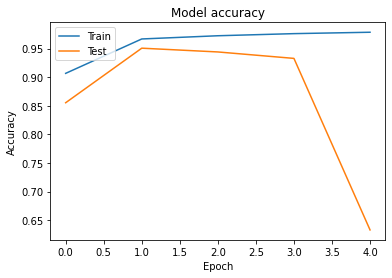

In [13]:
import matplotlib.pyplot as plt
import keras
from keras.applications.mobilenet import MobileNet
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

# Training generator with augmentation
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest')

# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Define
BATCH_SIZE = 300
N_CLASSES = 36
LR = 0.001
N_EPOCHS = 5
IMG_SIZE = 128

train_generator = train_datagen.flow_from_directory(
    './dataset/train',  # this is the target directory
    target_size=(IMG_SIZE, IMG_SIZE),  # all images will be resized to 128x128
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# This is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
    './dataset/validation',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# use modal
model = MobileNet(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=True, classes=N_CLASSES, weights=None)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# kien truc mo hinh
model.summary()



# Check point
cp_callback = "./models/weights.{epoch:02d}.h5"                                           
checkpoint = ModelCheckpoint(cp_callback, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Training
history = model.fit_generator(
    train_generator,
    steps_per_epoch=709595 // BATCH_SIZE,
    epochs=N_EPOCHS,
    validation_data=validation_generator,
    validation_steps=72000 // BATCH_SIZE,
    callbacks=callbacks_list)


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [15]:
!pip install tflearn
!pip install tensorflow_estimator

In [17]:
import keras
import matplotlib.pyplot as plt
from keras.applications.mobilenet import MobileNet
from keras.preprocessing.image import ImageDataGenerator
from tflearn.layers.core import fully_connected
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


# Training generator with augmentation
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest')

# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Define
BATCH_SIZE = 300
N_CLASSES = 36
LR = 0.001
N_EPOCHS = 4
IMG_SIZE = 128

train_generator = train_datagen.flow_from_directory(
    './dataset/train',  # this is the target directory
    target_size=(IMG_SIZE, IMG_SIZE),  # all images will be resized to 128x128
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# This is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
    './dataset/validation',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')


if __name__ == "__main__":
    #load model
    model = load_model("./re_traing/weights.03.h5")

# kien truc mo hinh
model.summary()


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    

# # create checkpoint
cp_callback = "./models/weights.{epoch:02d}.h5"                                           
checkpoint = ModelCheckpoint(cp_callback, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# fit the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=709595 // BATCH_SIZE,
    epochs=N_EPOCHS,
    validation_data=validation_generator,
    validation_steps=72000 // BATCH_SIZE,
    callbacks=callbacks_list)


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

ModuleNotFoundError: ignored

In [9]:
import time, psutil
Start = time.time()- psutil.boot_time()
Left= 12*3600 - Start
print('Time remaining for this session is: ', Left/3600)

Time remaining for this session is:  10.913908559746213
